In [1]:
!pip install pandas-profiling==2.7.1

In [2]:
from google.colab import drive
drive.mount("/content/gdrive/", force_remount=True)

%cd '/content/gdrive/MyDrive/LDS6_S7CN_KieuTriDang/Demo/Chapter2_Linear_Regression'

Mounted at /content/gdrive/
/content/gdrive/MyDrive/LDS6_S7CN_KieuTriDang/Demo/Chapter2_Linear_Regression


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp

In [4]:
df = pd.read_csv('location_rev.csv')
df.head()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
0,42247.80,3.0,30527.57,1407.0,3302.0,12.0
1,38628.37,3.0,30185.49,1025.0,4422.0,11.0
2,39715.16,1.0,32182.24,1498.0,3260.0,12.0
3,35593.30,5.0,29728.65,2340.0,4325.0,10.0
4,35128.18,4.0,30691.17,847.0,3774.0,11.0


In [5]:
profile = pp.ProfileReport(df)
profile

Output hidden; open in https://colab.research.google.com to view.

# Simple Linear Regressioon

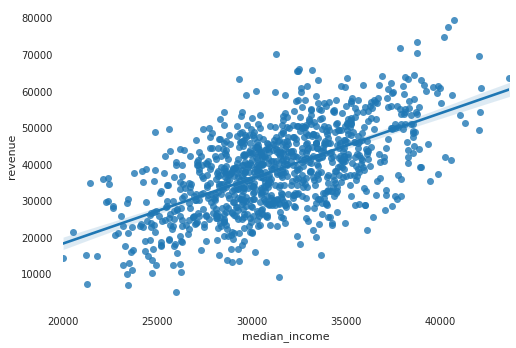

In [6]:
sns.regplot(data=df, x='median_income', y='revenue')
plt.show()

### Nhận xét: có rất nhiều điểm nằm xa đường thẳng khả năng gây nhiễu rất cao. Phương sai không ổn định khi nhìn vào thì thấy tập trung vào ở giữa nhưng lại thưa thớt ở 2 đầu.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


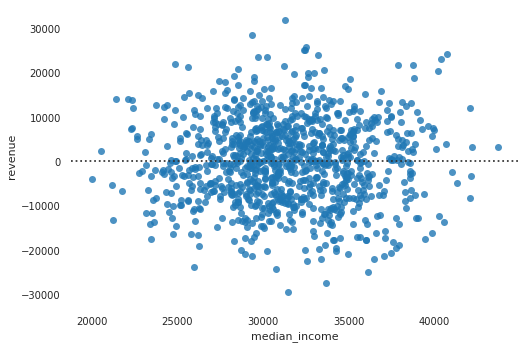

In [7]:
sns.residplot(df.median_income, df.revenue)
plt.show()

### Nhận xét: phần dư khá cao và không được trải đều trên trục x => Mô hình phi tuyến thì phù hợp mô hình tuyến tính.


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X1 = df[['median_income']]
y1 = df['revenue']

In [10]:
# Tạo đối tượng linear regression => huấn luyện model
# Nếu không xác định train:test thì default là 75:25
X1_train, X1_test, y1_train, y1_test  = train_test_split(X1, y1, random_state = 42)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression()
model.fit(X1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
y1_pred = model.predict(X1_test)

In [14]:
intercept = model.intercept_
slope = model.coef_[0]

In [15]:
print(intercept, slope)

-17944.393212607967 1.8044776691444901


# ĐÁNH GIÁ

In [16]:
# R^2 cho toàn bộ dữ liệu
model.score(X1_train, y1_train)
# Mô hình này chỉ giải thích được ~37% dữ liệu

0.37376263809946475

In [17]:
model.score(X1_test, y1_test)
# Mô hình này chỉ giải thích được ~32% dữ liệu

0.3246804918433005

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [19]:
mse = mean_squared_error(y1_pred, y1_test)
mse

90952579.47704405

In [20]:
mae = mean_absolute_error(y1_pred, y1_test)
mae

7751.936386800821

### Nhận xét: dựa trên mse, mae: thì sai số quá lớn đến gần 10% nên là không phù hợp.

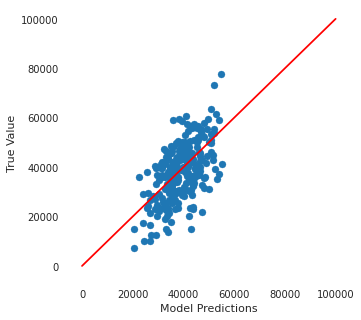

In [21]:
plt.figure(figsize=(5,5))
plt.scatter(y1_pred, y1_test)
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.plot([0, 100000], [0, 100000], '-k', color = 'r') # dựa vào giá trị min & max để xác định range
plt.show()

### Nhận xét: nếu như dự đoán và thực càng chính xác thì càng đường màu đỏ. Nên là đối với bộ data này simple linear không phù hợp, phải chọn phương pháp khác.

# Multiple Linear Regression

In [22]:
X = df[['num_competitors', 'median_income', 'num_loyalty_members', 'population_density', 'location_age']]
y = df['revenue']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [24]:
model_all = LinearRegression()
model_all.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
y_pred = model_all.predict(X_test)

In [26]:
model_all.intercept_

-51812.60099412094

In [27]:
model_all.coef_

array([-2.07278264e+03,  1.75664026e+00,  3.44931957e+00,  4.19605202e+00,
        2.05476936e+03])

### Đánh giá:

In [28]:
model_all.score(X, y)

0.8132461509626003

In [29]:
model_all.score(X_test, y_test)

0.8071185035764246

In [30]:
model_all.score(X_train, y_train)

0.8151586089690087

In [31]:
mse = mean_squared_error(y_pred, y_test)
mse

25977436.48928587

In [32]:
mae = mean_absolute_error(y_pred, y_test)
mae

4211.766053217495

### Nhận xét:
- R^2 train và test như nhau, cùng khá cao > 80%
- mse và mae đã giảm nhiều so với simple
- chọn model này

In [33]:
X_new = pd.DataFrame({
    'num_competitors': [3, 6],
    'median_income': [30000, 28000],
    'num_loyalty_members': [1200, 900],
    'population_density': [2000, 25000],
    'location_age': [10, 15]
})

In [34]:
y_new = model_all.predict(X_new)
y_new

array([ 27747.24013021, 123763.85905462])

In [35]:
X.mean()

num_competitors            3.3970
median_income          31360.6685
num_loyalty_members     1597.2000
population_density      3351.1990
location_age              11.0410
dtype: float64

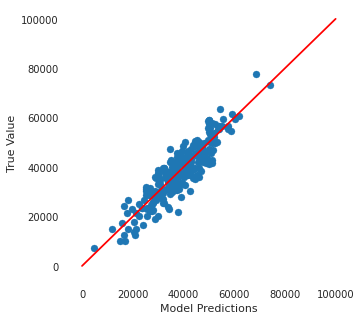

In [36]:
plt.figure(figsize=(5,5))
plt.scatter(y_pred, y_test)
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.plot([0, 100000], [0, 100000], '-k', color = 'r') # dựa vào giá trị min & max để xác định range
plt.show()

### Nhận xét:
- Đối với mô hình Multiple Linear Regression thì cho kết quả dự đoán gần với đường đỏ hơn
- Nghĩa là mô hình dự đoán có tính chính xác hơn nhiều

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

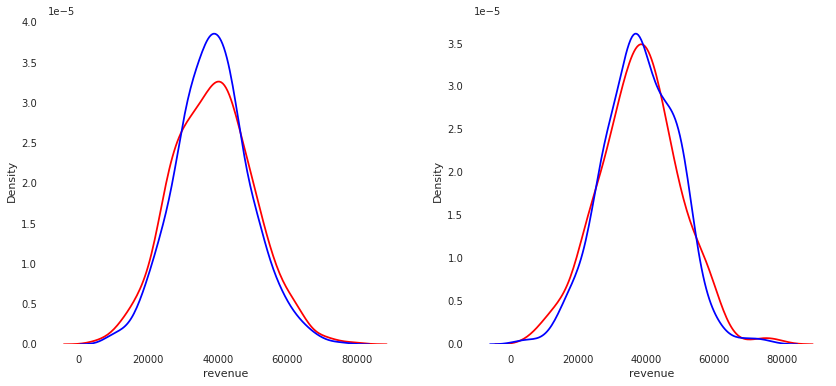

In [37]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax1 = sns.distplot(y_train, hist=False, color="r", 
                   label="Actual Train Values")
sns.distplot(model_all.predict(X_train), hist=False, color="b", 
             label="Predicted Train Values", ax=ax1)

plt.subplot(1,2,2)
ax2 = sns.distplot(y_test, hist=False, color="r", 
                   label="Actual Test Values")
sns.distplot(model_all.predict(X_test), hist=False, color="b", 
             label="Predicted Test Values" , ax=ax2)

plt.show()

In [38]:
from scipy.stats.stats import pearsonr

In [39]:
pearsonr(model_all.predict(X_test), y_test)

(0.8987229545498898, 9.180014250102443e-91)

# Lựa chọn thuộc tính

In [40]:
# Univariate Selection
from sklearn.feature_selection import SelectKBest, f_regression

In [41]:
# Apply SelectKBest class to extract all best features
bestfeatures = SelectKBest(score_func=f_regression, k = 'all')
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [42]:
# Concat two dataframes for better visualizatioon
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Speccs', 'Score']
featureScores.sort_values("Score", ascending = False, inplace = True)
featureScores

,Speccs,Score
1,median_income,566.922357
4,location_age,439.125397
3,population_density,107.360798
2,num_loyalty_members,30.949544
0,num_competitors,25.117590


In [43]:
corrmat = df.corr()
corrmat

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
revenue,1.000000,-0.156685,0.601888,0.173432,0.311653,0.552773
num_competitors,-0.156685,1.000000,-0.018398,-0.027283,0.035768,0.053796
median_income,0.601888,-0.018398,1.000000,0.011891,-0.041697,0.045621
num_loyalty_members,0.173432,-0.027283,0.011891,1.000000,-0.028611,0.036016
population_density,0.311653,0.035768,-0.041697,-0.028611,1.000000,-0.009977
location_age,0.552773,0.053796,0.045621,0.036016,-0.009977,1.000000


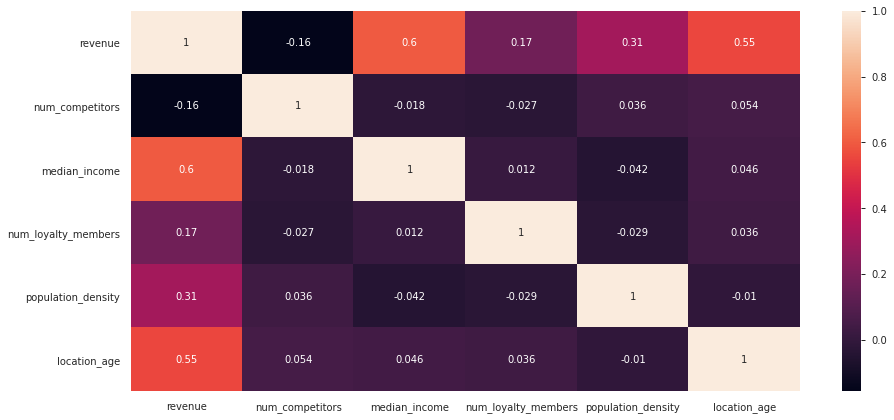

In [44]:
plt.figure(figsize = (15, 7))
sns.heatmap(df.corr(), annot = True)

### Nhận xét:
- So sánh thấy được là có tầm feature ổn: median_income, location_age và population_density

## Thực hành với 3 thuộc tính

In [45]:
X = df[[ 'median_income', 'population_density', 'location_age']]
y = df['revenue']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [47]:
model_all = LinearRegression()
model_all.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
y_pred = model_all.predict(X_test)

In [49]:
model_all.coef_

array([1.79209834e+00, 4.07066814e+00, 2.04594346e+03])

In [50]:
model_all.intercept_

-53970.61018014461

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

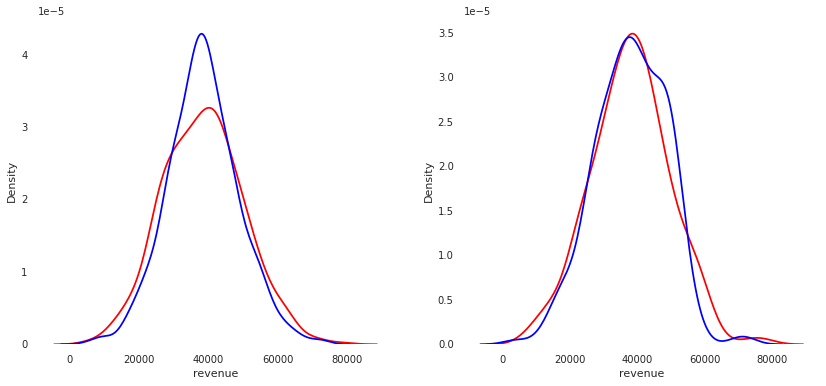

In [51]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax1 = sns.distplot(y_train, hist=False, color="r", 
                   label="Actual Train Values")
sns.distplot(model_all.predict(X_train), hist=False, color="b", 
             label="Predicted Train Values", ax=ax1)

plt.subplot(1,2,2)
ax2 = sns.distplot(y_test, hist=False, color="r", 
                   label="Actual Test Values")
sns.distplot(model_all.predict(X_test), hist=False, color="b", 
             label="Predicted Test Values" , ax=ax2)

plt.show()

In [52]:
pearsonr(model_all.predict(X_test), y_test)

(0.8586809943880427, 5.9717461799271086e-74)

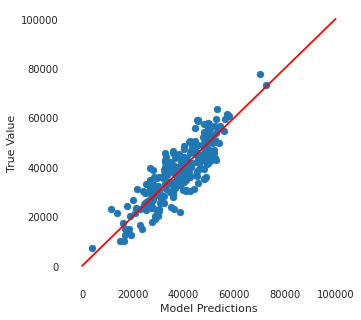

In [53]:
plt.figure(figsize=(5,5))
plt.scatter(y_pred, y_test)
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.plot([0, 100000], [0, 100000], '-k', color = 'r') # dựa vào giá trị min & max để xác định range
plt.show()

# Polynomial Regression

In [54]:
from sklearn.preprocessing import PolynomialFeatures

In [56]:
pr1 = PolynomialFeatures(degree = 2)
pr1

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

# Multivariate Polynomial

In [86]:
X = df[['num_competitors', 'median_income', 'num_loyalty_members', 'population_density', 'location_age']]
y = df['revenue']

In [87]:
pr2 = PolynomialFeatures(degree = 2)
pr2

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [106]:
X_pr = pr2.fit_transform(X)

In [89]:
X.shape, X_pr.shape

((1000, 5), (1000, 21))

In [90]:
X_pr_train, X_pr_test, y_pr_train, y_pr_test = train_test_split(X_pr, y, random_state = 100)

In [91]:
model = LinearRegression()

In [96]:
model.fit(X_pr_train, y_pr_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [97]:
y_pred = model.predict(X_pr_test)

In [99]:
model.score(X_pr, y)

0.8150761058368761

In [100]:
model.score(X_pr_train, y_pr_train)

0.8144937921706377

In [101]:
model.score(X_pr_test, y_pr_test)

0.8168340391491058

In [108]:
mse = mean_squared_error(y_pr_test, y_pred)
mse

23730880.66401473

In [109]:
mae = mean_absolute_error(y_pr_test, y_pred)
mae

3976.9444279200416